#Librerias

Para realizar la selección de características se requiere el uso de algunas librerías, primeramente, encontramos a pandas, la cual se especializa en el análisis y manejo de estructura de datos. Como segunda librería se implementa numpy, la cual permite realizar cálculos numéricos y el análisis de datos, especialmente para un gran volumen de datos. Posteriormente encontramos las librerías matplotlib y seaborn, las cuales nos posibilitan observar los datos de forma gráfica, por último, se encuentra sklearn, es una librería de aprendizaje automático que cuenta con varios algoritmos de clasificación, regresión y agrupamiento.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Cargar datos 

Con la utilización de pandas se realiza la lectura de un archivo .csv y se almacena en una variable llamada “df” que servirá como dataframe, se puede observar todas las características de los datos entre los cuales se ven características como el nombre del vehículo, el año, tipo de combustible, entre otros.

In [2]:
df = pd.read_csv('train-data.csv')


In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#Comprobar los datos que faltan

Posteriormente se realiza un proceso de verificación y limpieza de datos, donde se observe las columnas que contienen datos faltantes o nulos, con la finalidad de realizar un proceso de ingeniería de características y eliminar todos los datos nulos y procesarlos para su utilización en el modelo. Se realiza la eliminación de dos columnas, la primera que solo tiene índices, datos irrelevantes para el modelo y la segunda columna que se encontraba prácticamente vacía y no aportaba ningún dato relevante.    

In [4]:
df_missing = df.isna().sum()
print(df_missing[df_missing > 0])

Mileage         2
Engine         36
Power          36
Seats          42
New_Price    5195
dtype: int64


**Eliminar columna**

In [5]:
df = df.drop(columns=['Unnamed: 0', 'New_Price'])

In [6]:
df.dropna(inplace = True)
df_missing = df.isna().sum()
print(df_missing)

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


#Comprobar el tipo de datos

El siguiente proceso a realizar es verificar los tipos de datos que contiene el conjunto de datos, para lo cual se ejecuta una gráfica donde se observan los tipos de datos. El dataset utilizado cuenta con tres diferentes tipos datos como lo son objetos, enteros y flotantes. En base a los resultados obtenidos se puede determinar que hay variables numéricas que contienen letras, por lo cual deben ser formateadas para un correcto procesamiento.     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


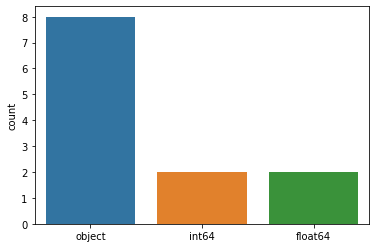

In [7]:
sns.countplot(df.dtypes.map(str))

#Cambiar el formato

El siguiente proceso el cambio de formato y tipo de los datos, para lo cual primero en las columnas que contienen texto y números, se procede a eliminar el texto y solo dejar datos numéricos, además de transformar su tipo de dato de objeto a uno de tipo flotante, con la finalidad de que sea más sencillo trabajar con el modelo.  

In [8]:
df["Engine"] = df["Engine"].str.replace('CC','')
df['Power'] = df['Power'].str.replace('bhp', '')
df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
df['Mileage'] = df['Mileage'].str.replace('km/kg', '')

#Cambiar el tipo de datos

In [9]:
df["Engine"] = df["Engine"].astype(float)
#df['Power'] = df['Power'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)

In [10]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,2.65


#Descripción de los datos 

In [11]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,18.179408,1621.606695,5.278828,9.501647
std,3.247238,9.155851e+04,4.521801,601.036987,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,624.000000,0.000000,0.440000
25%,2012.000000,3.390800e+04,15.200000,1198.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,10.000000,160.000000


#Hallar X, Y

A continuación, se realiza la selección de las columnas que conformaran la variable X y la columna que conformara la variable Y. Para la variable X se utiliza conjunto de datos y se elimina la columna “Price”, caso contrario para la variable Y, donde la única columna que almacena es la columna “Price”. El siguiente paso consiste en dividir el dividir el dataset en training and testing de una forma aleatoria.

In [12]:
X = df.drop(columns='Price')
y = df.Price

#Dividir el dataset en training and testing 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Transformar Datos  

Una vez dividido los datos se realiza un proceso de normalización para lo cual primero se obtiene la media de cada valor numérico del conjunto de datos. Posteriormente se eliminan las columnas categóricas, con la finalidad de poder realizar los cálculos numéricos correspondientes en el proceso de normalización.   

In [14]:
means = X_train.mean(axis=0)
means

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                  2013.419456
Kilometers_Driven    57412.610042
Mileage                 18.185082
Engine                1622.469247
Seats                    5.277406
dtype: float64

In [17]:
X_train_scaled = X_train.drop(columns=['Name','Location','Fuel_Type','Power','Transmission','Owner_Type'])

X_train_scaled

,Year,Kilometers_Driven,Mileage,Engine,Seats
1890,2016,21771,18.70,1199.0,5.0
2859,2018,4126,21.70,999.0,5.0
4127,2013,28000,14.80,1595.0,5.0
1178,2014,86925,11.20,2400.0,5.0
3382,2010,46000,11.80,2987.0,7.0
...,...,...,...,...,...
3799,2014,30000,14.21,2143.0,5.0
5233,2015,75000,23.20,1248.0,5.0
5268,2009,28000,17.00,1197.0,5.0
5433,2016,34952,19.81,1086.0,5.0


In [18]:

ranges = X_train_scaled.max(axis=0)-X_train_scaled.min(axis=0)
ranges


Year                     21.00
Kilometers_Driven    774400.00
Mileage                  33.54
Engine                 5374.00
Seats                    10.00
dtype: float64

In [19]:
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [ ]:
np.round(X_train.describe(), 1)

,Year,Kilometers_Driven,Mileage,Engine,Seats
count,4815.0,4815.0,4814.0,4784.0,4780.0
mean,2013.4,57424.4,18.2,1622.5,5.3
std,3.3,37523.6,4.6,606.6,0.8
min,1998.0,171.0,0.0,72.0,0.0
25%,2012.0,34000.0,15.3,1198.0,5.0
50%,2014.0,52827.0,18.2,1493.0,5.0
75%,2016.0,72167.0,21.1,1984.0,5.0
max,2019.0,775000.0,33.5,5998.0,10.0


In [20]:
np.round(X_train_scaled.describe(), 1)

,Engine,Kilometers_Driven,Mileage,Seats,Year
count,4780.0,4780.0,4780.0,4780.0,4780.0
mean,0.0,-0.0,-0.0,-0.0,-0.0
std,0.1,0.1,0.1,0.1,0.2
min,-0.2,-0.1,-0.5,-0.5,-0.7
25%,-0.1,-0.0,-0.1,-0.0,-0.1
50%,-0.0,-0.0,-0.0,-0.0,0.0
75%,0.1,0.0,0.1,-0.0,0.1
max,0.8,0.9,0.5,0.5,0.3


#Selección de características.

Se hace uso de un mapa de calor, el cual indica cómo se relacionan las características entre sí o con la variable de destino. La correlación puede ser positiva o negativa, en esta ocasión el mapa resultante indica diversos valores entre los cuales las columnas de “Seats”, “Engine” y “Year” muestran una mejor relación con la columna “Price” o nuestra variable Y

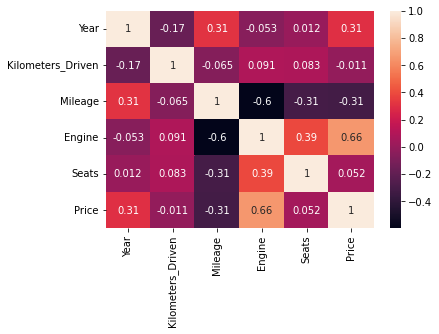

In [25]:
sns.heatmap(df.corr(), annot=True)